# ÍNDICE
# **Repsol D4D/D4B**
# **Introducción a Python para Análisis de Datos 🐍 📊**
# *Notebook 4: Limpieza de Datos*

---

### 📋 ÍNDICE DE CONTENIDO
1. OPERAR VALORES NULOS
2. OPERAR VALORES DUPLICADOS
3. IDENTIFICAR OUTLIERS
4. LIMPIEZA EN TEXT MINING
5. TIDY FORM
6. EJERCICIOS

### Juan Martin Bellido
* [linkedin.com/in/jmartinbellido](https://www.linkedin.com/in/jmartinbellido/) 
* jmbellido@isdi.education

In [ ]:
# antes de empezar, cargamos librerías (instalamos en caso de ser necesario)
import pandas as pd
import numpy as np
from scipy import stats

# OPERAR VALORES NULOS
---
Un valor nulo es aquel para el cual no tenemos información disponible. Esto es algo habitual a lo que nos enfrentamos al analizar datos y suele deberse a errores en la captura o manipulación de datos.



In [ ]:
# Importamos DataFrame
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

### Identificar valores nulos en un DataFrame
---

El primer paso es corroborar si existen valores nulos en nuestros DataFrame y, en tal caso, identificar en qué campos.

La receta que utilizaremos consta de dos funciones/métodos:

```
isna(object)
```
* *El método isna() testea si los valores son NaN (True) o no (False)*

```
any(boolean object)
```
* *El método any() permite comprobar si al menos un elemento es True*








In [ ]:
# Paso 1: aplicamos isna() al DataFrame para testear si cada elemento es nulo o no
nan_values = df_jamesbond.isna() # almacenamos el resultado en un nuevo objeto
nan_values # visualizamos el objeto creado

,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
Film,,,,,,
Dr. No,False,False,False,False,False,False
From Russia with Love,False,False,False,False,False,False
Goldfinger,False,False,False,False,False,False
Thunderball,False,False,False,False,False,False
Casino Royale,False,False,False,False,False,True
You Only Live Twice,False,False,False,False,False,False
On Her Majesty's Secret Service,False,False,False,False,False,False
Diamonds Are Forever,False,False,False,False,False,False
Live and Let Die,False,False,False,False,False,True


In [ ]:
# Paso 2: testeamos si al menos un elemento de cada campo es True (nulo)
df_jamesbond.isna().any() # aplicamos any() al objeto nan_values 
# nota: al visualizar el objeto, encontramos valores nulos para la variable "Bond Actor Salary"

Year                 False
Actor                False
Director             False
Box Office           False
Budget               False
Bond Actor Salary     True
dtype: bool

### Modificar valores nulos en un DataFrame
---
Una vez hemos identificado valores nulos, podemos decidir entre:
*   remover filas con al menos un valor nulo, o
*   reemplazar valores nulos

Funciones que introduciremos en esta sección:

```
fillna(value)
```
* *Este método reemplaza elementos nulos asignando el valor que establezcamos como parámetro*





In [ ]:
# Hemos identificado valores nulos en campo "Bond Actor Salary", ahora procederemos a omitir filas con valores nulos en esta variable
cond = df_jamesbond["Bond Actor Salary"].isna()
df_jamesbond[-cond] # negamos la confición para omitir filas con valores nulos para variable "Bond Actor Salary"

,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
Film,,,,,,
Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6
From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6
Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2
Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7
You Only Live Twice,1967,Sean Connery,Lewis Gilbert,514.2,59.9,4.4
On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,291.5,37.3,0.6
Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,442.5,34.7,5.8
Octopussy,1983,Roger Moore,John Glen,373.8,53.9,7.8
A View to a Kill,1985,Roger Moore,John Glen,275.2,54.5,9.1


In [ ]:
# De forma alternativa podríamos optar por reeplazar valores nulos por el valor de la media para esta variable 
median_bond_salary = df_jamesbond["Bond Actor Salary"].mean() # calculamos la media
df_jamesbond["Bond Actor Salary"]=df_jamesbond["Bond Actor Salary"].fillna(median_bond_salary) # reemplazamos valores nulos

# Nota: en otros casos simplemente buscaremos reemplazar valores nulos por 0 --> .fillna(0)

# OPERAR VALORES DUPLICADOS
---

In [ ]:
# Importamos un DataFrame que contiene valores duplicados
df_duplicates = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/renfe_estaciones_duplicates.csv")

#### Identificar valores duplicados

Funciones nuevas que introduciremos en esta sección:
```
object.duplicated()
```
> *Este método permite testear si una fila es duplicado perfecto de otra existente*



In [ ]:
len(df_duplicates) # comprobamos número de filas en DataFrame

630

In [ ]:
# Identificamos valores duplicados
cond = df_duplicates.duplicated()
df_duplicates[cond]

,CODIGO,DESCRIPCION,LATITUD,LONGITUD,DIRECCION,C.P.,POBLACION,PROVINCIA,PAIS
16,5000,GRANADA,37.184036,-3.609036,AVENIDA DE LOS ANDALUCES. S/N,18014.0,Granada,Granada,España
24,10204,ZARZALEJO,40.538817,-4.158073,CALLE DEL FERROCARRIL. S/N,28293.0,Zarzalejo,Madrid,España
57,11208,VITORIA/GASTEIZ,42.841528,-2.672665,PLAZUELA DE LA ESTACION. 1,1005.0,Vitoria-Gasteiz,Araba/Álava,España
74,11203,MANZANOS,42.742875,-2.867530,RIO ZADORRA KALEA. S/N,1220.0,Ribera Baja/Erribera Beitia,Araba/Álava,España
90,15006,CISNEROS,42.191068,-4.850206,CARRETERA P-932 - ESTACION FERROCARRIL. S/N,34320.0,Cisneros,Palencia,España
181,23004,PONTEVEDRA,42.421640,-8.635830,AVENIDA DE LA ESTACION. S/N,36003.0,Pontevedra,Pontevedra,España
222,31205,A GUDIÑA,42.060690,-7.132436,CARRETERA N-525 - BEATO SEBASTIAN APARICIO. S/N,32540.0,Gudiña. A,Ourense,España
227,34005,SAN PEDRO DEL ARROYO,40.803838,-4.871408,CALLE ESTACION FERROCARRIL. S/N,5350.0,San Pedro del Arroyo,Ávila,España
242,35206,NAVALMORAL DE LA MATA,39.894854,-5.545566,PLAZA ESTACION FERROCARRIL. 1,10300.0,Navalmoral de la Mata,Cáceres,España
253,37300,PUERTOLLANO,38.691411,-4.111611,CALLE MUELLE. S/N,13500.0,Puertollano,Ciudad Real,España


#### Remover valores duplicados

Funciones nuevas que introducidemos en esta sección:
```
object.drop_duplicates()
```
> *Este método elimina automáticamente filas duplicadas*

In [ ]:
df_clean = df_duplicates.drop_duplicates() # removemos filas duplicadas y almacenamos el output en un nuevo objeto

In [ ]:
len(df_clean) # corroboranos que el nuevo DataFrame contiene menos filas

620

# IDENTIFICAR OUTLIERS
---


In [ ]:
# Importamos DataFrame
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

Es importante identificar outliers en variables continuas. Dependiendo del caso, estaremos interesados únicamente en detectar posibles errores o en eliminar todo posible outliers (sea un error o no).



### Utilizando distribución normal (z)
---
Existen distintas formas de detectar outliers. En este curso, introduciremos un método sencillo: *normalizando la variable a z (distribución normal)*. En este método, asumiremos que la variable se distribuye normalmente y la convertiremos a z. Por convención, entendemos valores outliers a aquellos con valor absoluto mayor a 3 (z>3 y z<-3).

Funciones nuevas que introducimos en esta sección:

```
stats.zscore(column, nan_policy='omit')
```
* *Este método normaliza una variable a z (distribución normal)*





In [ ]:
# Normalizamos la variable "Box Office" a z
df_jamesbond["z_Box Office"] = stats.zscore(df_jamesbond["Box Office"],nan_policy='omit').round(2)

In [ ]:
# Seleccionamos "Box Office" y su versión normalizada
df_jamesbond[["Box Office","z_Box Office"]].sort_values("z_Box Office",ascending=False)
# Nota: no detectamos outliers

,Box Office,z_Box Office
Film,,
Skyfall,943.5,2.61
Thunderball,848.1,2.06
Goldfinger,820.4,1.90
Spectre,726.7,1.36
Casino Royale,581.5,0.52
From Russia with Love,543.8,0.30
Moonraker,535.0,0.25
The Spy Who Loved Me,533.0,0.24
GoldenEye,518.5,0.16


### Utilizando Rango Intercuartílico (IQR)
---
A continuación, introduciremos cómo detectar outliers utilizando el método del rango intercuartílico (IQR). Este método es menos restrictivo, ya que no asumimos distribución normal. Por ello, es un método adecuado cuando nos enfrentamos a un número bajo de observaciones.

Según el método de IQR, consideramos outliers a las observaciones que se desvíen más de *1.5 x IQR*
* El IQR es la diferencia entre donde termina el tercer y primer cuartil
* El IQR es fácilmente interpretable en un boxplot como *el tamaño de la caja*


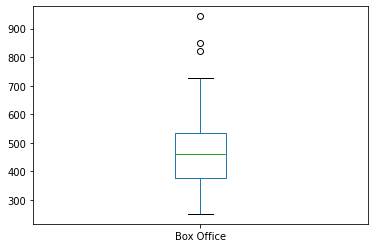

In [ ]:
# Visualizamos boxplot
df_jamesbond.boxplot(
  column='Box Office',
  grid=False 
)
# Un boxplot automáticamente identifica outliers como puntos encima del valor máximo, o debajo del valor mínimo

In [ ]:
# Creamos variables para almacenar métricas de distribución
dist_min = df_jamesbond["Box Office"].quantile(0)
dist_Q1 = df_jamesbond["Box Office"].quantile(0.25)
dist_median = df_jamesbond["Box Office"].quantile(0.5)
dist_Q3 = df_jamesbond["Box Office"].quantile(0.75)
dist_max = df_jamesbond["Box Office"].quantile(1)

In [ ]:
# Calculamos rango intercuartílico (IQR)
# En terminos visuales, el IQR es el tamaño de la caja
IQR = (dist_Q3-dist_Q1)

In [ ]:
# Creamos una condición para identificar outliers
# La condición es que la variable sea mayor a (IQR * 1.5) + Q3
cond = df_jamesbond["Box Office"] > (IQR * 1.5) + dist_Q3

In [ ]:
# Filtramos según la condición, para visualizar filas que se consideren outliers
df_jamesbond[cond].sort_values("Box Office",ascending=False)

,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
Film,,,,,,
Skyfall,2012,Daniel Craig,Sam Mendes,943.5,170.2,14.5
Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7
Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2


# LIMPIEZA EN TEXT MINING
---
A menudo un campo de tipo texto almacena información que nos gustaría dividir en múltiples columnas.

```
df.column.str.split(
  pat="",             # separator
  expand=True,        # expanding to multiple columns
  n=x                 # max number of columns
  )
```



In [ ]:
# Importamos df
df_movies = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/movies.csv")
df_movies[['movie_title','genres']].head()

,movie_title,genres
0,Avatar,Action|Adventure|Fantasy|Sci-Fi
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy
2,Spectre,Action|Adventure|Thriller
3,The Dark Knight Rises,Action|Thriller
4,Star Wars: Episode VII - The Force Awakens,Documentary


In [ ]:
# Utilizamos str.split() para dividir campo en múltiples columnas
df_movies.genres.str.split(pat="|",expand=True,n=3)

,0,1,2,3
0,Action,Adventure,Fantasy,Sci-Fi
1,Action,Adventure,Fantasy,None
2,Action,Adventure,Thriller,None
3,Action,Thriller,None,None
4,Documentary,None,None,None
...,...,...,...,...
4911,Comedy,Drama,None,None
4912,Crime,Drama,Mystery,Thriller
4913,Drama,Horror,Thriller,None
4914,Comedy,Drama,Romance,None


In [ ]:
# Operamos para conseguir el resultado final deseado
df_movies.genres.str.split(pat="|",expand=True,n=3)\
    .rename({0:'genre_1',1:'genre_2',2:'genre_3',3:'genre_4'},axis='columns')\
    .join(df_movies)\
    .loc[:,['movie_title','genre_1','genre_2','genre_3','genre_4']]


,movie_title,genre_1,genre_2,genre_3,genre_4
0,Avatar,Action,Adventure,Fantasy,Sci-Fi
1,Pirates of the Caribbean: At World's End,Action,Adventure,Fantasy,None
2,Spectre,Action,Adventure,Thriller,None
3,The Dark Knight Rises,Action,Thriller,None,None
4,Star Wars: Episode VII - The Force Awakens,Documentary,None,None,None
...,...,...,...,...,...
4911,Signed Sealed Delivered,Comedy,Drama,None,None
4912,The Following,Crime,Drama,Mystery,Thriller
4913,A Plague So Pleasant,Drama,Horror,Thriller,None
4914,Shanghai Calling,Comedy,Drama,Romance,None


# PIVOTAR DATA
---
En ocasiones, nos encontamos con tablas de datos que estructuran la información de forma inadecuada, dificultando la exploración y manipulación. Debemos mantener la unidad de observación lo más simple posible, de forma tal de favorecer la interpretación de la tabla de datos.



### De formato *long* a *wide*
---
El método *pivot* nos permite separar una variable en múltiples columnas, convirtiendo una tabla *long* en *wide*.

```
df.pivot(
  index= [] # columnas que no deseamos modificar
  ,columns=[] # columnas que deseamos expandir
  ,values='col_name' # nombre métrica
)
```



In [ ]:
# Importamos DataFrame
df_dummy_long_table = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/dummy_long_table.csv")
df_dummy_long_table

,country,year,type,count
0,Afghanistan,1999,cases,745
1,Afghanistan,1999,population,19987071
2,Afghanistan,2000,cases,2666
3,Afghanistan,2000,population,20595360
4,Brazil,1999,cases,37737
5,Brazil,1999,population,172006362
6,Brazil,2000,cases,80488
7,Brazil,2000,population,174504898
8,China,1999,cases,212258
9,China,1999,population,1272915272


In [ ]:
# Utilizamos el método .pivot() para convertir tabla "long" en "wide"
df_dummy_long_table.pivot(index='country',columns=['year','type'],values='count')

year           1999                2000            
type          cases  population   cases  population
country                                            
Afghanistan     745    19987071    2666    20595360
Brazil        37737   172006362   80488   174504898
China        212258  1272915272  213766  1280428583

### De formato *wide* a *long*
---
El método *melt* nos permite agrupar múltiples variables, reduciendo el número de columnas y aumentando la cantidad de filas.

```
df.melt(
  id_vars = [] # columnas que no deseamos modificar
  ,value_vars = [] # columnas que deseamos agrupar
  ,var_name = 'col_name' # nombre variable categórica
  ,value_name = 'col_name' # nombre métrica
)
```



In [ ]:
# Importamos tabla de datos
df_dummy_wide_table = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/dummy_wide_table.csv")
df_dummy_wide_table

,China,India,United States,Indonesia,Pakistan,Brazil,Nigeria,Bangladesh,Russia,Mexico
0,1439323776,1380004385,331002651,273523615,220892340,212559417,206139589,164689383,145934462,128932753


In [ ]:
# Utilizamos el método .melt() para convertir df "wide" a "long"
df_dummy_wide_table.melt(var_name='country',value_name='population')

,country,population
0,China,1439323776
1,India,1380004385
2,United States,331002651
3,Indonesia,273523615
4,Pakistan,220892340
5,Brazil,212559417
6,Nigeria,206139589
7,Bangladesh,164689383
8,Russia,145934462
9,Mexico,128932753


# EJERCICIOS
---

##### EX 1: Operar valores nulos
---
##### EX 1.1 Identificar columnas con valores nulos en el dataframe
##### EX 1.2 Reducir dataframe incluyendo únicamente los siguientes campos: *movie_title, director_name, imdb_score*. Remover observaciones con valores nulos.

> Dataset https://data-wizards.s3.amazonaws.com/datasets/movies.csv


In [ ]:
import pandas as pd
df_movies = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/movies.csv")
df_movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [ ]:
df_movies.isna().any()

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link              False
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [ ]:
df = df_movies[['movie_title','director_name','imdb_score']]
df.isna().any()

movie_title      False
director_name     True
imdb_score       False
dtype: bool

In [ ]:
df = df[-df.director_name.isna()]
df.isna().any()

movie_title      False
director_name    False
imdb_score       False
dtype: bool

##### EX 2: Identificar outliers
---

##### Detectar empresas que sean outliers en cantidad de empleados utilizando distribución normal.


> Dataset https://data-wizards.s3.amazonaws.com/datasets/fortune1000.csv

In [ ]:
import pandas as pd
from scipy import stats
df_fortune = pd.read_csv('https://data-wizards.s3.amazonaws.com/datasets/fortune1000.csv')
df_fortune.dtypes

Rank          int64
Company      object
Sector       object
Industry     object
Location     object
Revenue       int64
Profits       int64
Employees     int64
dtype: object

In [ ]:
df_fortune["z_Employees"] = stats.zscore(df_fortune["Employees"],nan_policy='omit').round(2)

In [ ]:
cond = abs(df_fortune['z_Employees'])>3
df_fortune[cond][['Company','Employees','z_Employees']].sort_values("z_Employees",ascending=False)

,Company,Employees,z_Employees
0,Walmart,2300000,25.08
217,Yum Brands,505000,5.22
16,Kroger,431000,4.40
108,McDonald’s,420000,4.28
30,IBM,411798,4.19
27,Home Depot,385000,3.89
37,Target,341000,3.41
47,UPS,341240,3.41
10,General Electric,333000,3.32
3,Berkshire Hathaway,331000,3.30


##### EX 3: Limpieza en text mining
---
##### El dataset contiene productos de Amazon. Limpiar las categorías de productos hasta obtener las 3 más representativas de cada producto.

> Dataset https://data-wizards.s3.amazonaws.com/datasets/amzn_products.txt



In [ ]:
import pandas as pd
df_amzn_products = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/amzn_products.txt",sep="\t")
df_amzn_products.dtypes

asin          object
brand         object
categories    object
dtype: object

In [ ]:
df_amzn_products.categories.str.split(pat=",",expand=True,n=3)\
  .iloc[:,0:3]\
  .rename({0:"prod_cat_1",1:"prod_cat_2",2:"prod_cat_3"},axis='columns')\
  .join(df_amzn_products)\
  .loc[:,['asin','brand','prod_cat_1','prod_cat_2','prod_cat_3']]

,asin,brand,prod_cat_1,prod_cat_2,prod_cat_3
0,B0168YIWSI,Microsoft,Electronics,Computers,Computer Accessories
1,"B018K251JE,B00VILQKQ8",Boytone,Electronics,Portable Audio & Video,Home Audio & Theater
2,B00C78VIUE,Sanus,Audio & Video Accessories,TV Mounts,TV Accessories & Parts
3,B075WKS4D8,Ultimate Ears,Portable Bluetooth Speakers,Bluetooth & Wireless Speakers,Portable Audio & Video
4,B000YA33DC,Lowepro,Photography,Photography Bags Cases,Camera Bags
5,B00505EZYW,Corsair,Computers,Memory (RAM),Computers & Accessories
6,B00WBS31OQ,"Sdi Technologies, Inc.",Portable Bluetooth Speakers,Stereos,Computers
7,"B0172DS3ME,B00NTJKAXG",Verizon Wireless,Computers,Networking,Home Networking & Connectivity
8,B00R5WGT2E,JVC,Electronics,Portable Audio,Auto & Tires
9,B00V631478,JBL,Electronics,Car & Vehicle Electronics,Car Electronics


##### EX 4: Tidy Data
---
##### La tabla de datos a continuación almacena información en formato *long*. Pivotar el DataFrame para presentar la data en formato *tidy*.

> Dataset https://data-wizards.s3.amazonaws.com/datasets/jersey_city_demographics.csv

In [ ]:
import pandas as pd
df_jersey_city = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jersey_city_demographics.csv")
df_jersey_city.head()

,year,title_field,value
0,2014,Total Population,262146
1,2014,Male Population,128065
2,2014,Male Under 5 years,9947
3,2014,Male 5 to 9 years,6188
4,2014,Male 10 to 14 years,5989


In [ ]:
df_jersey_city.pivot(index='title_field',columns='year',values='value')

year,2008,2009,2010,2011,2012,2013,2014
title_field,,,,,,,
Female - 10th grade,1443,2280,2585,1446,2373,1767,2469
Female - 11th grade,2619,2291,2172,1294,2149,1855,2346
"Female - 12th grade, no diploma",1879,2244,1934,2176,1442,2079,1213
Female - 5th and 6th grade,2045,1615,1941,1898,2211,2026,2418
Female - 7th and 8th grade,3543,2283,3156,1799,2720,2048,1354
...,...,...,...,...,...,...,...
Male Population 25 Years and over,75679,82542,81962,88845,86771,86382,90040
Male Under 5 years,7975,7946,8252,8347,8605,9116,9947
Total Population,229007,242513,248005,250317,254444,257345,262146
